In [1]:
# Use SVR ML to predict TSLA Stock for a specific day, this is same as the SVR Prototype, but is good practice

In [2]:
# import libraries
from sklearn.svm import SVR 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')

In [4]:
# store data to var
df = pd.read_csv('Data/TSLA-June-2020.csv')
# show data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
1,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
3,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
4,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
5,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
6,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
7,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
8,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000
9,2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000


In [5]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
20,2020-06-30,201.300003,217.537994,200.746002,215.962006,215.962006,84592500


In [6]:
# prep data for training
# remove last row
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
1,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
3,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
4,2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
5,2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
6,2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
7,2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
8,2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000
9,2020-06-15,183.557999,199.768005,181.699997,198.179993,198.179993,78486000


In [7]:
# create an empty list to store the indepedent and dependent data
days = list()
adj_close_prices = list()

In [8]:
# Get the date and adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [9]:
# create the independent data set
for day in df_days:
    days.append( [int(day.split('-')[2])] )

# create the dependent data set
for adj_close_price in df_adj_close:
    adj_close_prices.append( float(adj_close_price) )

In [10]:
# create the 3 Support Vector Regression Models (SVR Models)

# Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# Create and train a SVR model using polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)

# Create and train a SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, gamma=0.15)

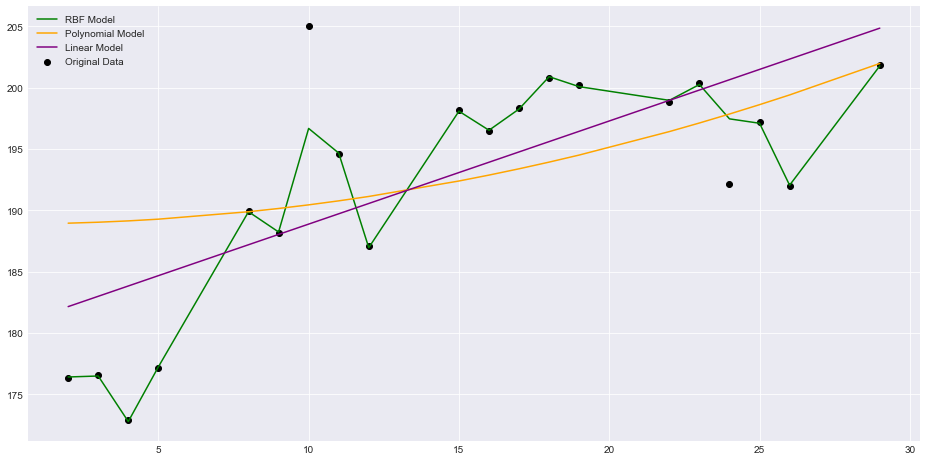

In [11]:
# plot the models on a graph to see which has the best fit to the original data

plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [15]:
# show the predicted price for a given day
day = [[30]]

print('The RBF SVR prediction is: ', rbf_svr.predict(day))
print('The Linear SVR prediction is: ', lin_svr.predict(day))
print('The Polynomial SVR prediction is: ', poly_svr.predict(day))
print('The actual price is: ', actual_price['Adj Close'][20])

The RBF SVR prediction is:  [210.88747482]
The Linear SVR prediction is:  [205.69014877]
The Polynomial SVR prediction is:  [202.8900647]
The actual price is:  215.962006
